In [1]:
# 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 다항 회귀(Polynomial Regression)

### 다항 회귀(Polynomial Regression) 이해

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**
- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

PolynomialFeatures(degree=차수)

fit_transform(피처)

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [5]:
poly = PolynomialFeatures()
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [11]:
X3 = np.arange(16).reshape(4,4)
print(X3)
print(poly.fit_transform(X3))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[  1.   0.   1.   2.   3.   0.   0.   0.   0.   1.   2.   3.   4.   6.
    9.]
 [  1.   4.   5.   6.   7.  16.  20.  24.  28.  25.  30.  35.  36.  42.
   49.]
 [  1.   8.   9.  10.  11.  64.  72.  80.  88.  81.  90.  99. 100. 110.
  121.]
 [  1.  12.  13.  14.  15. 144. 156. 168. 180. 169. 182. 195. 196. 210.
  225.]]


In [12]:
def polynomial_func(X):
    return 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3

In [17]:
X = np.arange(0,4).reshape(-1,2)
print(X)
poly_ftrs = PolynomialFeatures().fit_transform(X)
print(poly_ftrs)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [15]:
X4 = np.arange(6).reshape(-1,2)
print(X4)
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X4)

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [16]:
y = polynomial_func(X)
y

array([  5, 119])

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_ftrs, y)
np.round(model.coef_, 3)

array([0.   , 1.839, 1.839, 3.677, 5.516, 7.355])

In [19]:
model.predict(poly_ftrs)

array([  5., 119.])

In [23]:
def polynomial_func(X):
    return 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3

X = np.arange(0,4).reshape(-1,2)
y = polynomial_func(X)

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)), 
        ('linear', LinearRegression())])

model = pipe.fit(X,y)
model

,steps,"[('poly', ...), ('linear', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [24]:
model.named_steps

{'poly': PolynomialFeatures(degree=3), 'linear': LinearRegression()}

In [29]:
model.named_steps['linear'].coef_

array([0.        , 0.18018018, 0.18018018, 0.36036036, 0.54054054,
       0.72072072, 0.72072072, 1.08108108, 1.62162162, 2.34234234])

**3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성**

즉 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

**3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습**

### 파이프라인(Pipeline)을 이용한 3차 다항회귀 학습  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

**`sklearn.pipeline의 Pipeline 클래스`**

- 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스

- 형식 : 연속된 단계를 나타내는 (name, transforms) 튜플 목록을 입력받음
    - 마지막 단계에서는 transforms와 estimator를 모두 사용할 수 있고, 그외는 transforms여야 함
    - transforms는 fit_transform() 메서드를 가지고 있어야 함
    - estrimator는 fit(), predict() 메서드를 가지고 있어야 함
    
- 파이프라인의 fit() 메서드 호출:
    - 모든 transforms의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달
    - 마지막 단계에서는 fit()메서드만 호출

- 파이프라인 객체는 마지막 estimator와 동일한 메서드를 제공

In [20]:
from sklearn.pipeline import Pipeline

### 가상 데이터 생성 및 다항 회귀 추정

**가상 데이터 생성**

In [30]:
np.random.seed(0)
n=100
X = 6*np.random.rand(n,1) -3
y = 0.5*X**2 + 2*X + np.random.randn(n,1)

In [32]:
X_ = np.linspace(-3,3,100).reshape(100,1)
y_ = 0.5*X_**2 + 2*X_

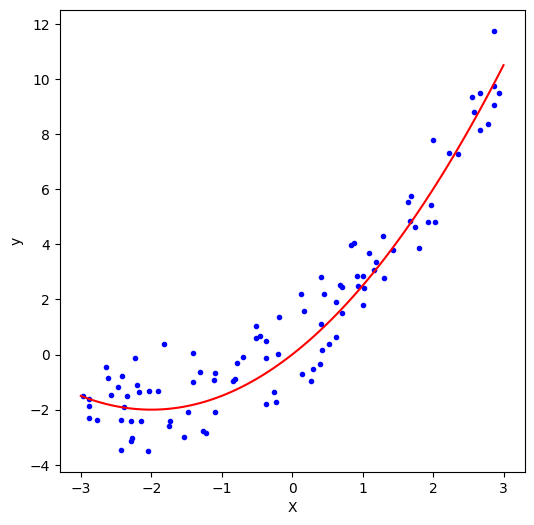

In [33]:
plt.figure(figsize=(6,6))
plt.plot(X, y, 'b.')
plt.plot(X_, y_, 'r-')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**scatterplot**

In [34]:
from scipy import stats
stat, p = stats.pearsonr(X[:,0], y[:,0])
print(f'Pearson stat:{stat:.4f}, p:{p}')

Pearson stat:0.9002, p:3.6240521183682972e-37


- 비선형적으로 분포하고 있는 데이터에 단순히 직선으로 예측하는 것은 잘 안맞을 것이다.
- 사이킷런의 PolynomialFeatures를 사용

**다항식으로 변환**

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

**선형회귀 LinearRegression 적용하여 회귀계수 추정**

In [40]:
X2 = pd.DataFrame(X, columns=['X'])
y2 = pd.DataFrame(y, columns=['y'])
X2_ = sm.add_constant(X2, has_constant='add')

In [41]:
model1 = sm.OLS(y2, X2_)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     419.0
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           3.62e-37
Time:                        17:14:08   Log-Likelihood:                -187.48
No. Observations:                 100   AIC:                             379.0
Df Residuals:                      98   BIC:                             384.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6831      0.160     10.515      0.000       1.365       2.001
X              1.8857      0.092     20.469      0.000       1.703       2.069
==============================================================================
Omnibus:                        1.202   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.288
Skew:                           0.224   Prob(JB):                        0.525
Kurtosis:                       2.670   Cond. No.                         1.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
def draw_resid_plot(fitted, resid):
    plt.figure(figsize=(6,6))
    plt.scatter(fitted, result1.resid)
    xmin = np.floor(plt.xlim()[0])
    xmax = np.floor(plt.xlim()[1])
    plt.hlines(0, xmin, xmax, colors = 'gray', ls = '--')
    plt.title('Fitted values vs Residuals')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

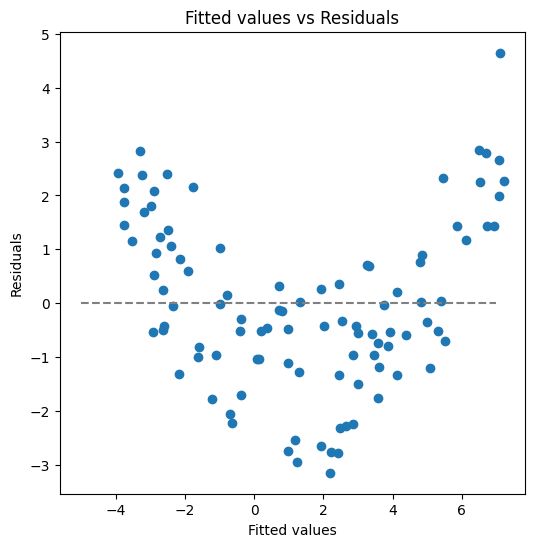

In [48]:
draw_resid_plot(result1.fittedvalues, result1.resid)

**다항회귀식 시각화**

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [49]:
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [50]:
def get_residual(y_test, y_pred,top_n=10,sort=False):
    df = pd.DataFrame(y_test.values, columns=['Real_y'])
    df['Pred_y'] = np.round(y_pred)
    df['abs(Residual)'] = df['Real_y'] - df['Pred_y']
    if sort:
        df = df.sort_values(by='abs(Residual)', ascending=False)
    
    return df[:top_n]

In [51]:
def reg_coeff_plot(model, ftr_names):
    coef = pd.Series(data=np.round(model.coef_, 5), index=ftr_names)
    coef_s = coef.sort_values(ascending=False)
    sns.barplot(x=coef_s, y=coef_s.index)
    plt.show()
    print(f'회귀계수들\n{coef}')

In [66]:
def print_eval_regr_scores(y, pred,is_log=False):
    rmse_val = rmse(y, pred)
    # rmsle = mean_squared_log_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    if is_log:
        rmsle = mean_squared_log_error(y, pred)
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f}, RMSLE:rmse{rmsle:.3f}, R2:{r2:.3f}')
    else:
        print(f'RMSE:{rmse_val:.3f}, MAE:{mae:.3f}, R2:{r2:.3f}')

In [53]:
model2 = LinearRegression()
model2.fit(X, y)
y_pred = model2.predict(X)

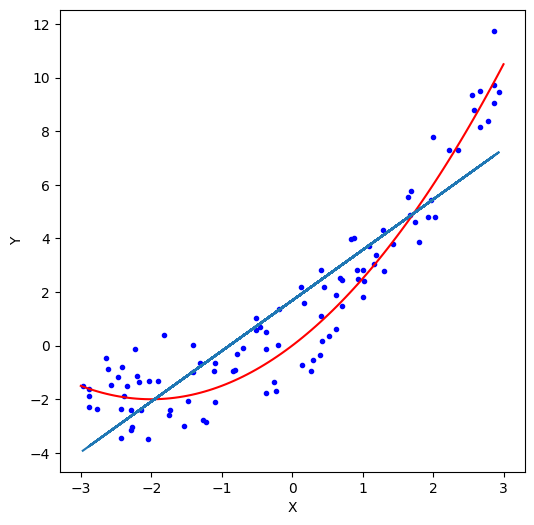

In [60]:
plt.figure(figsize=(6,6))
plt.plot(X, y , 'b.' )
plt.plot(X_, y_ , 'r-' )
plt.plot(X, y_pred, '-', label='linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [61]:
model2.intercept_[0], model2.coef_[0,0]

(np.float64(1.6831189333577286), np.float64(1.8856922991178462))

In [69]:
print(f'y={model2.intercept_[0]:.3f}+{model2.coef_[0,0]:.3f}X')
print_eval_regr_scores(y,y_pred)

y=1.683+1.886X
RMSE:1.578, MAE:1.276, R2:0.810


In [70]:
pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression())])
model3 = pipe.fit(X, y)
print(f'다항회귀식의 \n intercept: {model3.named_steps['linear'].intercept_[0]:.3f}')
print(f'coefs : {np.round(model3.named_steps['linear'].coef_)}')
y_pred2 = model3.predict(X)
print_eval_regr_scores(y, y_pred2)

다항회귀식의 
 intercept: 0.341
coefs : [[0. 2. 0.]]
RMSE:0.987, MAE:0.828, R2:0.926


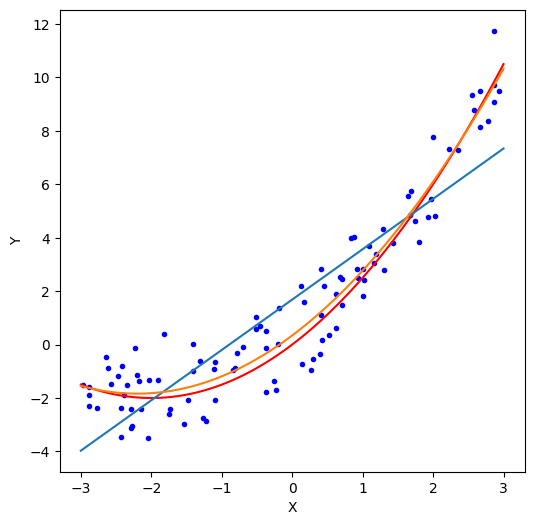

In [73]:
y_pred_lin = model2.predict(X_)
y_pred_poly = model3.predict(X_)
plt.figure(figsize=(6,6))
plt.plot(X, y , 'b.' )
plt.plot(X_, y_, 'r-', label='origin')
plt.plot(X_, y_pred_lin, '-' ,label='linear')
plt.plot(X_, y_pred_poly, '-', label='poly')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [76]:
pipe2 = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
model4 = pipe2.fit(X, y)
print(f'다항회귀식의 \n intercept: {model4.named_steps['linear'].intercept_[0]:.3f}')
print(f'coefs: {np.round(model4.named_steps['linear'].coef_,3)}')
y_pred3 = model4.predict(X)
print_eval_regr_scores(y, y_pred3)

다항회귀식의 
 intercept: 0.346
coefs: [[0.    1.912 0.449 0.012]]
RMSE:0.985, MAE:0.825, R2:0.926


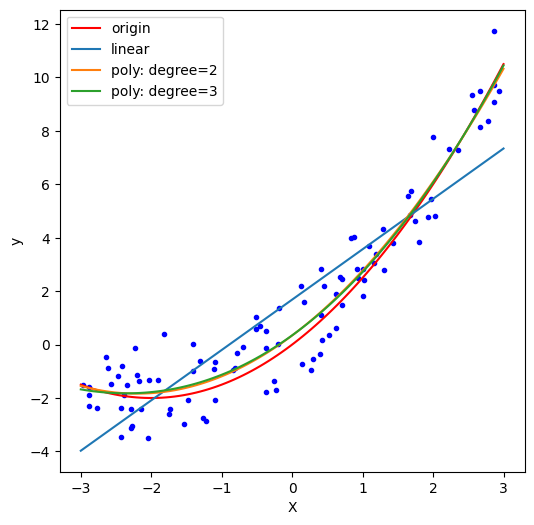

In [77]:
y_pred_lin = model2.predict(X_)
y_pred_poly = model3.predict(X_)
y_pred_poly2 = model4.predict(X_)
plt.figure(figsize=(6,6))
plt.plot(X, y, 'b.')
plt.plot(X_, y_, 'r-', label='origin')
plt.plot(X_, y_pred_lin, '-', label='linear')
plt.plot(X_, y_pred_poly, '-', label='poly: degree=2')
plt.plot(X_, y_pred_poly2, '-', label='poly: degree=3')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

---